In [1]:
import pandas as pd

In [2]:
crime = pd.read_hdf('data/crime.h5')

In [3]:
crime_sort = crime.set_index('REPORTED_DATE').sort_index()

In [4]:
crime_sort.head(3)

,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,GEO_LON,GEO_LAT,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC
REPORTED_DATE,,,,,,,
2012-01-02 00:06:00,aggravated-assault,aggravated-assault,-104.816860,39.796717,montbello,1,0
2012-01-02 00:06:00,violation-of-restraining-order,all-other-crimes,-104.816860,39.796717,montbello,1,0
2012-01-02 00:16:00,traffic-accident-dui-duid,traffic-accident,-104.971851,39.736874,cheesman-park,0,1


In [5]:
crime_sample_quarterly = crime_sort.resample('Q')

In [6]:
type(crime_sample_quarterly)

pandas.core.resample.DatetimeIndexResampler

In [7]:
quarterly_crimes = crime_sample_quarterly['IS_CRIME', 'IS_TRAFFIC'].sum()

In [8]:
quarterly_crimes.head()

,IS_CRIME,IS_TRAFFIC
REPORTED_DATE,,
2012-03-31,7882,4726
2012-06-30,9641,5255
2012-09-30,10566,5003
2012-12-31,9197,4802
2013-03-31,8730,4442


#### with 'resample(Q)', we get sampled with end of quarter, we can use 'QS' to get start of quarter

In [9]:
crime_sort.resample('QS')['IS_CRIME', 'IS_TRAFFIC'].sum().head()

,IS_CRIME,IS_TRAFFIC
REPORTED_DATE,,
2012-01-01,7882,4726
2012-04-01,9641,5255
2012-07-01,10566,5003
2012-10-01,9197,4802
2013-01-01,8730,4442


In [10]:
crime_sort.groupby(pd.Grouper(freq='Q'))['IS_CRIME', 'IS_TRAFFIC'].sum().head()

<ipython-input-10-25d813c11969>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  crime_sort.groupby(pd.Grouper(freq='Q'))['IS_CRIME', 'IS_TRAFFIC'].sum().head()


,IS_CRIME,IS_TRAFFIC
REPORTED_DATE,,
2012-03-31,7882,4726
2012-06-30,9641,5255
2012-09-30,10566,5003
2012-12-31,9197,4802
2013-03-31,8730,4442


In [11]:
plot_args = {'figsize' : (16, 4), 'color' : ['black', 'red'], 'title' : 'crimes in denver'}

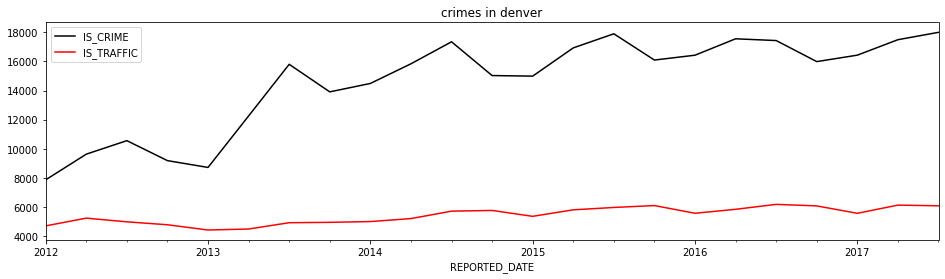

In [12]:
plot = quarterly_crimes.plot(**plot_args)

#### querters to beginw ith April 1st

In [13]:
crime_sort.resample('QS-APR')['IS_CRIME', 'IS_TRAFFIC'].sum().head()

,IS_CRIME,IS_TRAFFIC
REPORTED_DATE,,
2012-01-01,7882,4726
2012-04-01,9641,5255
2012-07-01,10566,5003
2012-10-01,9197,4802
2013-01-01,8730,4442


### to get increase in crime from first quarter

In [14]:
crime_start = quarterly_crimes.iloc[0]

In [15]:
crime_start

IS_CRIME      7882
IS_TRAFFIC    4726
Name: 2012-03-31 00:00:00, dtype: int64

In [16]:
change_in_crimes = quarterly_crimes.divide(crime_start).sub(1).round(2)

In [17]:
change_in_crimes.head(3)

,IS_CRIME,IS_TRAFFIC
REPORTED_DATE,,
2012-03-31,0.00,0.00
2012-06-30,0.22,0.11
2012-09-30,0.34,0.06


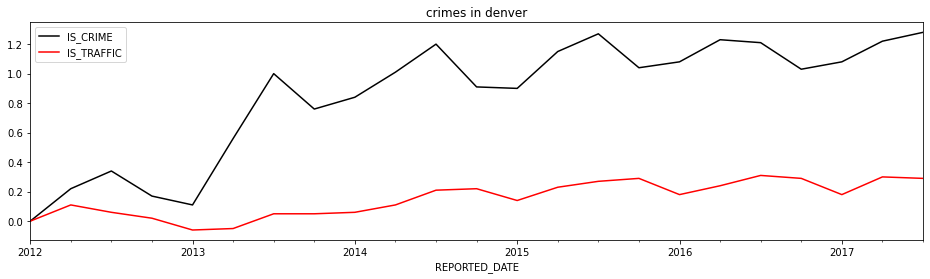

In [18]:
plot = change_in_crimes.plot(**plot_args)